In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

from dataset.dataset import NoCDataset
from model.vanilla import VanillaModel


In [2]:
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler

dataset = NoCDataset()
print(f"#Samples = {len(dataset)}")

print(dataset[0])

num_examples = len(dataset)
num_train = int(num_examples * 0.9)

train_sampler = SubsetRandomSampler(torch.arange(num_train))
test_sampler = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader = GraphDataLoader(
    dataset, sampler=train_sampler, batch_size=1, drop_last=False)
test_dataloader = GraphDataLoader(
    dataset, sampler=test_sampler, batch_size=1, drop_last=False)


#Samples = 2689
(Graph(num_nodes={'packet': 12, 'router': 12},
      num_edges={('packet', 'pass', 'router'): 52, ('router', 'backpressure', 'router'): 16, ('router', 'connect', 'router'): 16, ('router', 'transfer', 'packet'): 52},
      metagraph=[('packet', 'router', 'pass'), ('router', 'router', 'backpressure'), ('router', 'router', 'connect'), ('router', 'packet', 'transfer')]), tensor([7.6242, 7.6242]))


In [3]:
device = "cpu"
# device = "cuda:0"

model = VanillaModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
losses = []

epoches = 30
for e in range(epoches):
    print("#" * 60)
    print(f"epoch = {e}")
    print("#" * 60)

    pbar = tqdm(train_dataloader)

    for i, data in enumerate(pbar):

        g, congestion = data
        g = g.to(device)

        pred = model(g)
        loss = F.l1_loss(pred, congestion)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 30 == 0:
            losses.append(loss.item())
            pbar.set_postfix(loss=loss.item())



############################################################
epoch = 0
############################################################


  0%|          | 0/2420 [00:00<?, ?it/s]/tmp/ipykernel_24059/3220090337.py:22: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(pred, congestion.squeeze())
/home/xuechenhao/anaconda3/envs/py38/lib/python3.8/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 2420/2420 [00:18<00:00, 130.22it/s, loss=3.97]  


############################################################
epoch = 1
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.20it/s, loss=560]  


############################################################
epoch = 2
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 129.68it/s, loss=5.26] 


############################################################
epoch = 3
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 129.16it/s, loss=0.0863]


############################################################
epoch = 4
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 127.66it/s, loss=4]     


############################################################
epoch = 5
############################################################


100%|██████████| 2420/2420 [00:19<00:00, 126.78it/s, loss=1.77]   


############################################################
epoch = 6
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.66it/s, loss=0.32]  


############################################################
epoch = 7
############################################################


100%|██████████| 2420/2420 [00:19<00:00, 126.66it/s, loss=109]   


############################################################
epoch = 8
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.07it/s, loss=7.26]    


############################################################
epoch = 9
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.05it/s, loss=1.74]   


############################################################
epoch = 10
############################################################


100%|██████████| 2420/2420 [00:19<00:00, 127.08it/s, loss=1.75]   


############################################################
epoch = 11
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 127.59it/s, loss=3.61]   


############################################################
epoch = 12
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 127.79it/s, loss=0.871]


############################################################
epoch = 13
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.02it/s, loss=0.0649]


############################################################
epoch = 14
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 127.99it/s, loss=290]    


############################################################
epoch = 15
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 127.59it/s, loss=1.28]  


############################################################
epoch = 16
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.60it/s, loss=2.23]    


############################################################
epoch = 17
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.52it/s, loss=1.69]   


############################################################
epoch = 18
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.62it/s, loss=1.51]   


############################################################
epoch = 19
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 127.73it/s, loss=0.947] 


############################################################
epoch = 20
############################################################


100%|██████████| 2420/2420 [00:19<00:00, 126.88it/s, loss=0.101] 


############################################################
epoch = 21
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.84it/s, loss=9.47]  


############################################################
epoch = 22
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 127.91it/s, loss=0.415]  


############################################################
epoch = 23
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 129.16it/s, loss=1.89]   


############################################################
epoch = 24
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 127.71it/s, loss=0.294]  


############################################################
epoch = 25
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 128.27it/s, loss=0.0233]


############################################################
epoch = 26
############################################################


100%|██████████| 2420/2420 [00:18<00:00, 127.60it/s, loss=13.8]   


############################################################
epoch = 27
############################################################


100%|██████████| 2420/2420 [00:19<00:00, 126.95it/s, loss=0.152]  


############################################################
epoch = 28
############################################################


100%|██████████| 2420/2420 [00:19<00:00, 126.92it/s, loss=0.0834] 


############################################################
epoch = 29
############################################################


100%|██████████| 2420/2420 [00:19<00:00, 127.37it/s, loss=3.63]  


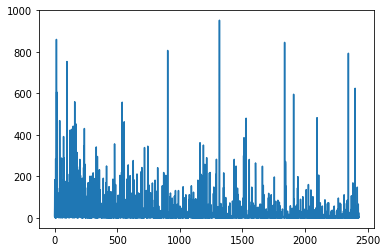

In [4]:
plt.plot(losses)

100%|██████████| 269/269 [00:01<00:00, 219.37it/s]


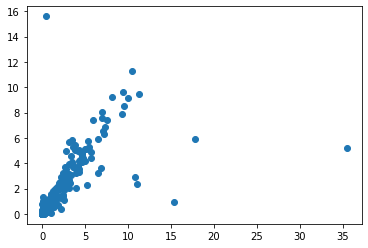

In [11]:
# test accuracy
# we use relative error to measure

mae_losses = []
x = []
y = []

pbar = tqdm(test_dataloader)
for i, data in enumerate(pbar):

    g, congestion = data
    congestion = congestion
    g = g.to(device)

    pred = model(g)
    pred = F.relu(pred)
    loss = F.mse_loss(pred, congestion)

    pred = pred.detach().squeeze().numpy()
    congestion = congestion.squeeze().numpy()

    # print(f"iteration: {i}; loss = {loss.item()}")
    # print(f"pred = {pred}")
    # print(f"congestion = {congestion}")

    x.append(abs(congestion[0] - pred[0]))
    y.append(abs(congestion[1] - pred[1]))

plt.scatter(x, y)
